<a href="https://colab.research.google.com/github/Benjamilior/proyecy_miner_02/blob/main/Modelos_de_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulando los Datos 01/Aplicando K-Means



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
#Lista va de 0 - 15 #
url_song = ['https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_01.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_02.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_03.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_04.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_05.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song06.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song07.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song08.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song09.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song10.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song11.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song12.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song13.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song14.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song15.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song16.csv']
#Merge CSV
mergedata = pd.concat(pd.read_csv(url_song).assign(sourcefilename = url_song)for url_song in url_song)
mergedata = mergedata.reset_index()







Escojiendo Parametros

In [ ]:
mergedata_outstr = mergedata.drop(['sourcefilename','analysis_url','track_href','uri','id','type','index','Unnamed: 0','X','duration_ms','speechiness','acousticness','instrumentalness','liveness','key'], axis=1)
mergedata_outstr.head()
mergedata_outstr.info()
mergedata_outstr.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   danceability    2172 non-null   float64
 1   energy          2172 non-null   float64
 2   loudness        2172 non-null   float64
 3   mode            2172 non-null   int64  
 4   valence         2172 non-null   float64
 5   tempo           2172 non-null   float64
 6   time_signature  2172 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 118.9 KB


,danceability,energy,loudness,mode,valence,tempo,time_signature
count,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000
mean,0.631763,0.685210,-7.906230,0.572284,0.577594,121.812044,3.930018
std,0.162697,0.232954,4.957582,0.494861,0.276114,27.086121,0.306059
min,0.061500,0.001970,-40.688000,0.000000,0.028700,58.748000,1.000000
25%,0.540000,0.589000,-8.894000,0.000000,0.350750,103.016750,4.000000
50%,0.656500,0.745000,-6.492000,1.000000,0.594000,122.443000,4.000000
75%,0.750000,0.859000,-4.888000,1.000000,0.826000,133.526250,4.000000
max,0.976000,0.999000,-0.135000,1.000000,0.990000,208.113000,5.000000


Normalizando Datos

In [ ]:
# mergedata_norms = (mergedata_outstr-mergedata_outstr.min())/(mergedata_outstr.max())-(mergedata_outstr.min())
# mergedata_norms.describe()
mergedata_norms = mergedata_outstr

Buscando el K Optimo

In [ ]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, max_iter = 300)
  kmeans.fit(mergedata_norms)
  wcss.append(kmeans.inertia_)

  


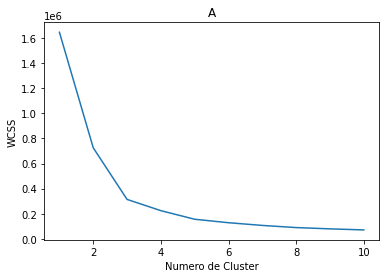

In [ ]:
plt.plot(range(1,11), wcss)
plt.title("A")
plt.xlabel("Numero de Cluster")
plt.ylabel("WCSS")
plt.show()

Aplicando el Modelo

In [ ]:
clustering = KMeans(n_clusters=9, max_iter=300)
clustering.fit(mergedata_norms)

KMeans(n_clusters=9)

In [ ]:
mergedata_norms['Kmeans_Clusters'] = clustering.labels_

Visualizando

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_music = pca.fit_transform(mergedata_norms)
pca_musica_df = pd.DataFrame(data = pca_music, columns=['Componentes_01', 'Componente_02'])
pca_nombres_music = pd.concat([pca_musica_df,mergedata_norms[['Kmeans_Clusters']]],axis=1)
pca_nombres_music


,Componentes_01,Componente_02,Kmeans_Clusters
0,-1.685407,-0.686431,5
1,1.224012,-0.813636,5
2,-3.841555,-1.295657,5
3,3.285443,-2.472903,5
4,-3.792025,-3.408884,5
...,...,...,...
2167,3.087344,1.999852,5
2168,-33.916106,-3.470211,2
2169,46.444905,-2.403478,1
2170,54.339728,-3.083709,1


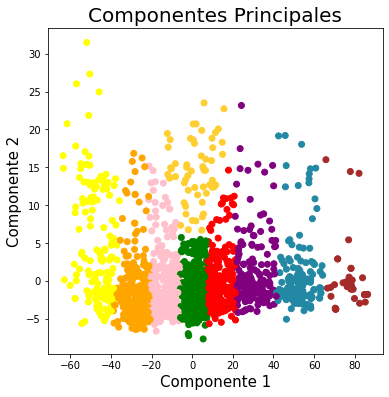

In [ ]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20 )

color_theme = np.array(["#FFCE30","#2388A4","orange","red","purple","green","yellow","pink","brown","golden"])
ax.scatter(x = pca_nombres_music.Componentes_01, y = pca_nombres_music.Componente_02,
           c=color_theme[pca_nombres_music.Kmeans_Clusters])
plt.show()


In [ ]:
mergedata_outfinal = mergedata_norms.drop(['danceability','energy','loudness','mode','valence','tempo','time_signature'], axis=1)
mergedata_outfinal.drop([2171],axis=0)
mergedata_outfinalk = mergedata
mergedata_outfinalk['Kmeans'] = mergedata_outfinal
mergedata_outfinalk


 


,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename,Kmeans
0,0,1,0,0.542,0.659,8,-7.289,1,0.0389,0.00279,...,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4,https://raw.githubusercontent.com/Benjamilior/...,5
1,1,2,1,0.727,0.681,5,-7.114,0,0.0265,0.00214,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,https://raw.githubusercontent.com/Benjamilior/...,5
2,2,3,2,0.613,0.783,1,-6.736,1,0.1380,0.02440,...,117.952,audio_features,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,4,https://raw.githubusercontent.com/Benjamilior/...,5
3,3,4,3,0.848,0.821,2,-5.408,0,0.0527,0.01690,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,https://raw.githubusercontent.com/Benjamilior/...,5
4,4,5,4,0.754,0.763,7,-4.627,0,0.0435,0.03010,...,117.953,audio_features,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,4,https://raw.githubusercontent.com/Benjamilior/...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,161,162,61,0.886,0.482,7,-9.882,1,0.1750,0.39600,...,124.956,audio_features,3HQxzXOb4p9pfpD5gP38D5,spotify:track:3HQxzXOb4p9pfpD5gP38D5,https://api.spotify.com/v1/tracks/3HQxzXOb4p9p...,https://api.spotify.com/v1/audio-analysis/3HQx...,232560,4,https://raw.githubusercontent.com/Benjamilior/...,5
2168,162,163,62,0.706,0.739,4,-5.055,0,0.0962,0.17600,...,87.790,audio_features,3kdgsWJBpqqHL3wyQGl26t,spotify:track:3kdgsWJBpqqHL3wyQGl26t,https://api.spotify.com/v1/tracks/3kdgsWJBpqqH...,https://api.spotify.com/v1/audio-analysis/3kdg...,389168,4,https://raw.githubusercontent.com/Benjamilior/...,2
2169,163,164,63,0.518,0.820,5,-4.268,1,0.1620,0.27100,...,168.148,audio_features,2y9oZ18fhOTkHjOhbHbqEI,spotify:track:2y9oZ18fhOTkHjOhbHbqEI,https://api.spotify.com/v1/tracks/2y9oZ18fhOTk...,https://api.spotify.com/v1/audio-analysis/2y9o...,209416,4,https://raw.githubusercontent.com/Benjamilior/...,1
2170,164,165,64,0.732,0.807,10,-3.424,0,0.1160,0.44500,...,176.026,audio_features,6NfC2FKfsfzuLIF4lThw0A,spotify:track:6NfC2FKfsfzuLIF4lThw0A,https://api.spotify.com/v1/tracks/6NfC2FKfsfzu...,https://api.spotify.com/v1/audio-analysis/6NfC...,226379,4,https://raw.githubusercontent.com/Benjamilior/...,1


# Jerarquico


In [ ]:
rjson6
index = ['0']
ke = ['0']
X = ['0']
rjson6['index'] = X
rjson6['Unnamed: 0'] = ke
rjson6['X'] = X
rjson6['sourcefilename'] = "Cualquier cosa"
rjson6["level_0"] = "32"
nombre_columnas = ['level_0','index', 'Unnamed: 0','X','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','type','id','uri','track_href', 'analysis_url','duration_ms','time_signature','sourcefilename']
rjson6 = rjson6[nombre_columnas]
rjson7 = rjson6
rjson7

,level_0,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename
0,32,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,0.448,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline
#Lista va de 0 - 15 
url_song = ['https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_01.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_02.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_03.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_04.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_05.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song06.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song07.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song08.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song09.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song10.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song11.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song12.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song13.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song14.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song15.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song16.csv']
#Merge CSV
mergedataj = pd.concat(pd.read_csv(url_song).assign(sourcefilename = url_song)for url_song in url_song)
mergedataj = mergedataj.reset_index()
mergedata = pd.concat([mergedata, rjson7])
mergedata

,level_0,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename,Kmeans
0,0.0,0,1,0,0.542,0.659,8,-7.289,1,0.0389,...,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
1,1.0,1,2,1,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
2,2.0,2,3,2,0.613,0.783,1,-6.736,1,0.1380,...,117.952,audio_features,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
3,3.0,3,4,3,0.848,0.821,2,-5.408,0,0.0527,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
4,4.0,4,5,4,0.754,0.763,7,-4.627,0,0.0435,...,117.953,audio_features,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,4,https://raw.githubusercontent.com/Benjamilior/...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa,NaN
0,NaN,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa,NaN
0,NaN,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa,NaN
0,32,0,0,0,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,Cualquier cosa,NaN


In [ ]:
mergedata_outstrj = mergedataj.drop(['time_signature','sourcefilename', 'analysis_url','track_href','uri','id','type','index','Unnamed: 0','X','duration_ms','speechiness','acousticness','instrumentalness','liveness','key','loudness','mode','valence','tempo'], axis=1)


In [ ]:
mergedata_array = mergedata_outstrj.iloc[:,[0,1]].values
mergedata_array

array([[0.542, 0.659],
       [0.727, 0.681],
       [0.613, 0.783],
       ...,
       [0.518, 0.82 ],
       [0.732, 0.807],
       [0.812, 0.855]])

Creando Dendograma

In [ ]:
clustering_jerarquico = linkage(mergedata_array, 'ward')


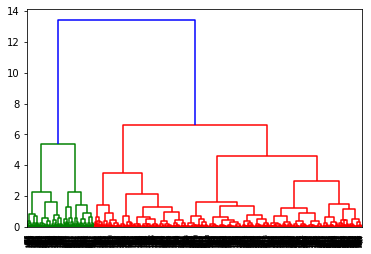

In [ ]:
dendrogram=sch.dendrogram(clustering_jerarquico)

In [ ]:
clusters = fcluster(clustering_jerarquico, t=3, criterion='distance')
clusters

array([3, 6, 4, ..., 4, 5, 5], dtype=int32)

In [ ]:
mergedata_outstrj["Clustering Jerarquico"] = clusters
mergedata_outstrj

,danceability,energy,Clustering Jerarquico
0,0.542,0.659,3
1,0.727,0.681,6
2,0.613,0.783,4
3,0.848,0.821,5
4,0.754,0.763,5
...,...,...,...
2167,0.886,0.482,6
2168,0.706,0.739,6
2169,0.518,0.820,4
2170,0.732,0.807,5


In [ ]:
mergedata_finalj = mergedata_outstrj.drop(['energy','danceability'], axis=1)
mergedataj['Jerarquico'] = mergedata_finalj
mergedataj

,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename,Jerarquico
0,0,1,0,0.542,0.659,8,-7.289,1,0.0389,0.00279,...,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4,https://raw.githubusercontent.com/Benjamilior/...,3
1,1,2,1,0.727,0.681,5,-7.114,0,0.0265,0.00214,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,https://raw.githubusercontent.com/Benjamilior/...,6
2,2,3,2,0.613,0.783,1,-6.736,1,0.1380,0.02440,...,117.952,audio_features,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,4,https://raw.githubusercontent.com/Benjamilior/...,4
3,3,4,3,0.848,0.821,2,-5.408,0,0.0527,0.01690,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,https://raw.githubusercontent.com/Benjamilior/...,5
4,4,5,4,0.754,0.763,7,-4.627,0,0.0435,0.03010,...,117.953,audio_features,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,4,https://raw.githubusercontent.com/Benjamilior/...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,161,162,61,0.886,0.482,7,-9.882,1,0.1750,0.39600,...,124.956,audio_features,3HQxzXOb4p9pfpD5gP38D5,spotify:track:3HQxzXOb4p9pfpD5gP38D5,https://api.spotify.com/v1/tracks/3HQxzXOb4p9p...,https://api.spotify.com/v1/audio-analysis/3HQx...,232560,4,https://raw.githubusercontent.com/Benjamilior/...,6
2168,162,163,62,0.706,0.739,4,-5.055,0,0.0962,0.17600,...,87.790,audio_features,3kdgsWJBpqqHL3wyQGl26t,spotify:track:3kdgsWJBpqqHL3wyQGl26t,https://api.spotify.com/v1/tracks/3kdgsWJBpqqH...,https://api.spotify.com/v1/audio-analysis/3kdg...,389168,4,https://raw.githubusercontent.com/Benjamilior/...,6
2169,163,164,63,0.518,0.820,5,-4.268,1,0.1620,0.27100,...,168.148,audio_features,2y9oZ18fhOTkHjOhbHbqEI,spotify:track:2y9oZ18fhOTkHjOhbHbqEI,https://api.spotify.com/v1/tracks/2y9oZ18fhOTk...,https://api.spotify.com/v1/audio-analysis/2y9o...,209416,4,https://raw.githubusercontent.com/Benjamilior/...,4
2170,164,165,64,0.732,0.807,10,-3.424,0,0.1160,0.44500,...,176.026,audio_features,6NfC2FKfsfzuLIF4lThw0A,spotify:track:6NfC2FKfsfzuLIF4lThw0A,https://api.spotify.com/v1/tracks/6NfC2FKfsfzu...,https://api.spotify.com/v1/audio-analysis/6NfC...,226379,4,https://raw.githubusercontent.com/Benjamilior/...,5


In [ ]:
mergedata_outfinalk['Kmeans'][2172]
#CAMBIAR EN CASO DE QUE EL DATA FRAME CAMBIE LA CANTIDAD DE DATOS


4

In [ ]:
mergedata_outfinalk[mergedata_outfinalk['Kmeans']==mergedata_outfinalk['Kmeans'][2172]]